In [46]:
# Student: Xiang Liu
# Course: Topics 6983

# Please change the path of provided dataset and test the script using Jupyter Notebook
# There are two functions included in this script and please run the codes in sequence
# Dataset Description:
# The dataset from Yahoo Finance contains Alibaba stock data from 2015-1-1 to 2017-1-1.
# There are 7 variables in the original dataset including:
#1. Date - The specific date of normal trading day for Alibaba in two years (505 trading days)
#2. Open - The opening price of Alibaba stock（daily）
#3. High - The top price of Alibaba stock（daily）
#4. Low - The lowest price of Alibaba stock（daily）
#5. Close - The closing price of Alibaba stock（daily）
#6. Adj Close - The adjusted closing price of Alibaba stock（daily）
#7. Volume - The number of shares or contracts traded in Alibaba stock（daily）
def plot_corr(Alibaba,size=10):
# The implemented function is to explore the correlation between multiple variables within stock. 
# The terms of stock market is undefined for many participants and also the correlations
# In the stock market, some attributes seems like contain strong correlation but weak correlation in fact. 
# Therefore, this function assists user to find some potential correlations that not expected before and 
# Compare different correlations for further insights. Plot the correlations into graph and get a better view
# There are different colors to show the intensity of correlation between different variables
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: Alibaba
        size: vertical and horizontal size of the plot'''

    corr = Alibaba.corr()
    fig, ax = plt.subplots(figsize=(16, 12))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    return

In [47]:
def show_data(Alibaba):
# The implemented function is to plot a variable contained by dataset and give a more precise view
# Volume as an important variable for stock evaluation and use grid for easily observe the amount
# Stock market participants can find extremly high or low value and analyze by corresponding date for further understanding
# Extract the performance of Alibaba stock in 2015 and changed plot attributes for better data visualization
    Alibaba['Date'] = pd.to_datetime(Alibaba['Date'])
    volume_data = Alibaba['Volume']
    plt.autoscale(True, 'both', None)
    plt.rc('axes', grid=True)
    plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
    plt.plot(Alibaba['Date'], volume_data)
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.setp(plt.gca().get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.show()
    return

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline

#Load the file from specific path
Alibaba = pd.read_csv("~/Desktop/BABA.csv")
#Use column list to extract data
colList = Alibaba.columns.tolist()

In [49]:
Alibaba.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,106.459999,106.470001,103.690002,103.940002,103.940002,10283400
1,2015-01-02,104.239998,104.720001,102.519997,103.599998,103.599998,12303400
2,2015-01-05,102.760002,103.019997,99.900002,101.000000,101.000000,18337000
3,2015-01-06,101.250000,103.849998,100.110001,103.320000,103.320000,15720400
4,2015-01-07,104.589996,104.739998,102.029999,102.129997,102.129997,11052200
5,2015-01-08,102.949997,105.339996,102.680000,105.029999,105.029999,12942100
6,2015-01-09,105.239998,105.300003,102.889999,103.019997,103.019997,10167300
7,2015-01-12,103.199997,103.360001,101.209999,101.620003,101.620003,7997200
8,2015-01-13,102.589996,102.849998,100.010002,100.769997,100.769997,11294400
9,2015-01-14,99.279999,100.180000,98.059998,99.580002,99.580002,17808000


In [50]:
#Find the values of stock's adjusted value between 2015-1-1 to 2017-1-1
# the average value of Adjusted Close
mean_AdjClose = Alibaba[colList[5]].mean()
print('average value of adjusted close:', mean_AdjClose)
# the maximum value of Adjusted Close
max_AdjClose = Alibaba[colList[5]].max()
print('maximum value of adjusted close:', max_AdjClose)
# the minimum value of Adjusted Close
min_AdjClose = Alibaba[colList[5]].min()
print('minimum value of adjusted close:', min_AdjClose)

average value of adjusted close: 83.16199988118811
maximum value of adjusted close: 109.360001
minimum value of adjusted close: 57.389998999999996


In [51]:
# Alibaba stock KDJ indicator calculations and add into dataset as new columns
low_list = Alibaba['Low'].rolling(9, min_periods = 1).min()
high_list = Alibaba['High'].rolling(9, min_periods = 1).max()
rsv = (Alibaba['Adj Close'] - low_list) / (high_list - low_list) * 100
Alibaba['K'] = rsv.ewm(com = 2).mean()
Alibaba['D'] = Alibaba['K'].ewm(com = 2).mean()
Alibaba['J'] = 3 * Alibaba['K'] - 2 * Alibaba['D']

# Alibaba stock moving average 5days, 20days and 60 days add into dataset as new columns
ma_list = [5, 20, 60]
for ma in ma_list:
    Alibaba['MA_' + str(ma)] = pd.Series.rolling(Alibaba['Close'], ma).mean()

In [52]:
# Show the new dataset
Alibaba.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,K,D,J,MA_5,MA_20,MA_60
0,2014-12-31,106.459999,106.470001,103.690002,103.940002,103.940002,10283400,8.992809,8.992809,8.992809,NaN,NaN,NaN
1,2015-01-02,104.239998,104.720001,102.519997,103.599998,103.599998,12303400,20.002185,15.598435,28.809687,NaN,NaN,NaN
2,2015-01-05,102.760002,103.019997,99.900002,101.000000,101.000000,18337000,18.458239,16.953079,21.468558,NaN,NaN,NaN
3,2015-01-06,101.250000,103.849998,100.110001,103.320000,103.320000,15720400,32.413722,23.375192,50.490781,NaN,NaN,NaN
4,2015-01-07,104.589996,104.739998,102.029999,102.129997,102.129997,11052200,33.000441,27.070193,44.860938,102.797999,NaN,NaN
5,2015-01-08,102.949997,105.339996,102.680000,105.029999,105.029999,12942100,49.473911,35.256815,77.908103,103.015999,NaN,NaN
6,2015-01-09,105.239998,105.300003,102.889999,103.019997,103.019997,10167300,48.770971,40.041574,66.229764,102.899999,NaN,NaN
7,2015-01-12,103.199997,103.360001,101.209999,101.620003,101.620003,7997200,40.934765,40.351393,42.101509,103.023999,NaN,NaN
8,2015-01-13,102.589996,102.849998,100.010002,100.769997,100.769997,11294400,31.457291,37.307514,19.756845,102.513999,NaN,NaN
9,2015-01-14,99.279999,100.180000,98.059998,99.580002,99.580002,17808000,27.869029,34.105830,15.395425,102.004000,NaN,NaN


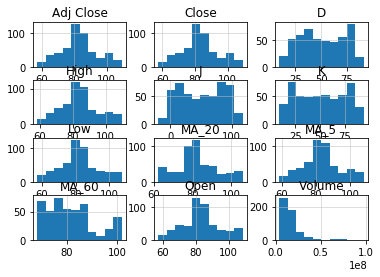

In [53]:
#Histograms of varibales in dataset to explore distributions
from matplotlib import pyplot
Alibaba.hist()
pyplot.show()

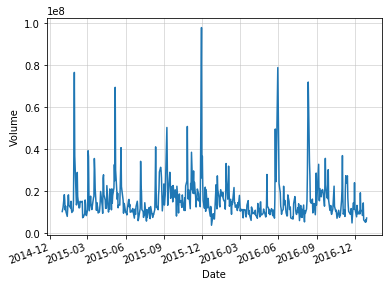

In [54]:
show_data(Alibaba)

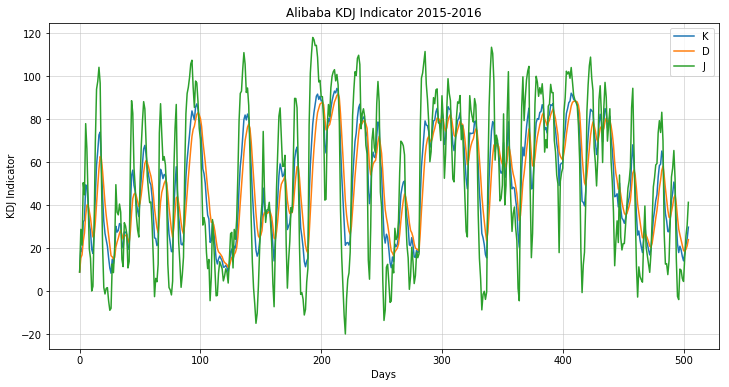

In [55]:
# KDJ indicator as an important index for stock market participants to find the intersection between lines and determine trading strategy
# The plot includes calculated KDJ indicator to observe the interactions
# Stock term: golden intersection and dead intersection to predict stock price trend
fig = plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('KDJ Indicator')
plt.title('Alibaba KDJ Indicator 2015-2016')
Alibaba["K"].plot(grid = True) 
Alibaba["D"].plot(grid = True) 
Alibaba["J"].plot(grid = True) 
plt.legend(loc='best')

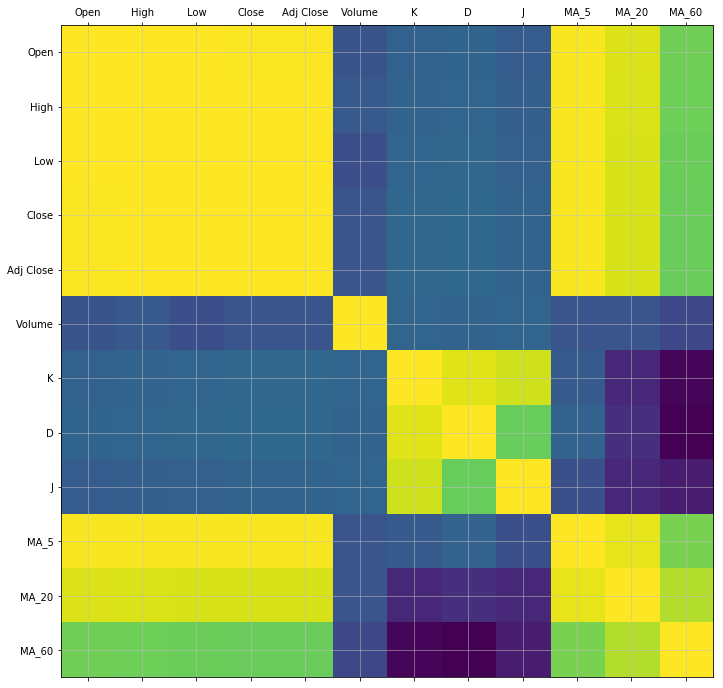

In [56]:
# After add KDJ into dataset, the correlation matrix between variables becomes a wider matrix to explore more correlation
plot_corr(Alibaba)

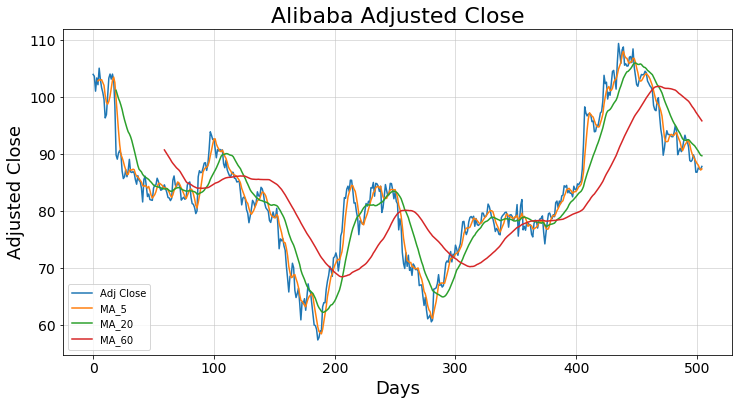

In [57]:
# Alibaba adjusted close price line chart with changed title and font
# Add moving average lines into adjusted close for strategy analysis
# Example: Common Strategy with moving average: stock price increase and higher than moving average lines could be a signal of buy in
fig,ax = plt.subplots()
ax.plot(Alibaba.index,Alibaba['Adj Close'])
#Resize plot
fig.set_size_inches(12,6)
plt.title('Alibaba Adjusted Close',fontsize=22)
ax.set_xlabel('Days',fontsize=18)
ax.set_ylabel('Adjusted Close',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
Alibaba["MA_5"].plot(grid = True) 
Alibaba["MA_20"].plot(grid = True) 
Alibaba["MA_60"].plot(grid = True) 
plt.legend(loc='best')

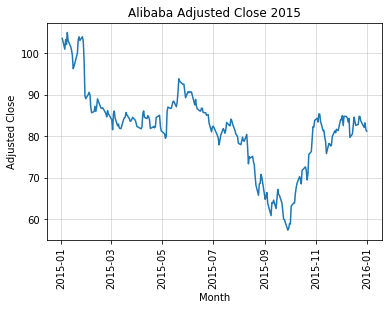

In [58]:
# Alibaba adjusted close with 253 days start from 2015-1-1
Alibaba['Date'] = pd.to_datetime(Alibaba['Date'])
first_year = Alibaba[1:253]
plt.plot(first_year['Date'], first_year['Adj Close'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title('Alibaba Adjusted Close 2015')
plt.show()

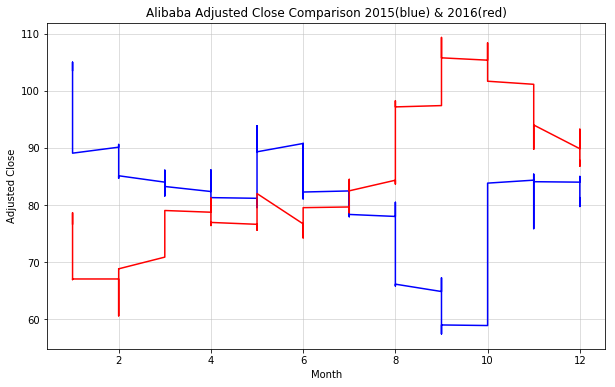

In [59]:
# Alibaba adjusted close comparison between 2015 and 2016, find the pattern of increase and decrease
# get clearly comparison between two years
Alibaba['Month'] = Alibaba['Date'].dt.month
Alibaba['Month'] = Alibaba['Date'].dt.month
fig = plt.figure(figsize=(10,6))
plt.plot(Alibaba[1:253]['Month'], Alibaba[1:253]['Adj Close'], c='blue')
plt.plot(Alibaba[253:505]['Month'], Alibaba[253:505]['Adj Close'], c='red')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title('Alibaba Adjusted Close Comparison 2015(blue) & 2016(red)')
plt.show()